# Saarthak Marathe | ME17B162
## Week 6: Assignment

## K-means Clustering

In [1]:
#Import libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

In [21]:
# Write code here
df = pd.read_csv('kmc-data1.csv', header = None)

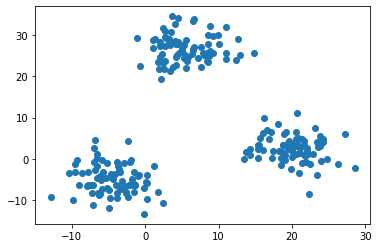

In [5]:
plt.scatter(df[0], df[1])

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

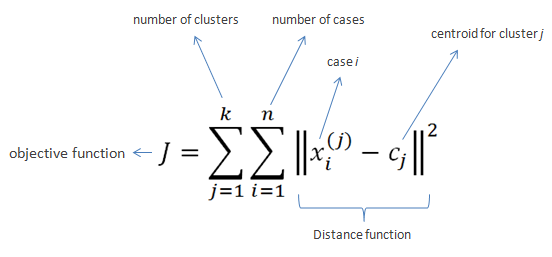

In [6]:
# Write code here
c = [6.67,8.33]
wcss = 0
for i in range(len(df)):
    wcss = wcss + ((df[0][i] - c[0])**2 + (df[1][i] - c[1])**2)
wcss

73409.43272669794

**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [58]:
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size], dtype=int) #Create an array to store classes of each data
    #Your code here
    dim = data.shape[1]
    for i in range(size):
        min = float('inf')
        for j in range(K):
            dist = 0
            for d in range(dim):
                dist = dist + (data[d][i] - centroids[d][j])**2
            if dist < min:
                min = dist
                data_class[i] = int(j+1)
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [62]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    for i in range(K):
        centroids[i] = np.mean(data[data_class == (i+1)], axis=0)
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [30]:
def wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    #Your code here
    dim = data.shape[1]
    for i in range(K):
        for j in range(len(data)):
            for d in range(dim):
                wcss_clusterwise[i] = wcss_clusterwise[i] + (data[d][j] - centroids[d][i])**2 
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [105]:
def kmeans(data,K,centroids):
    # Write code here
    centroids_old = centroids
    dfcent = pd.DataFrame(centroids)
    error = float('inf')
    while error>0.001:
        data_class = get_class(data,dfcent,K)
        centroids_new = get_centroids(data,data_class,K)
        error = np.linalg.norm(centroids_new - centroids_old)
        dfcent = pd.DataFrame(centroids_new)
        centroids_old = centroids_new
        #print(error)
    dfcentnew = pd.DataFrame(centroids_new)
    data_class = get_class(data,dfcentnew,K)
    return centroids_new, data_class

In [77]:
centroids = [[10, 30],[25, -5],[-5, 10]]
dfcent = pd.DataFrame(centroids)
K = 3
data = df
centroids_new, data_class = kmeans(data,K,dfcent)

17.914958739240923
0.6072872318577026
0.0


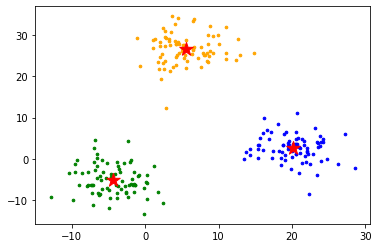

In [89]:
colors=['orange', 'blue', 'green']
for i in range(len(data)):
    plt.scatter(data[0][i], data[1][i], s=7, color = colors[int(data_class[i])])
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='r', s=200)

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [135]:
#  Write code here
def ssd_calc(data, centroids):
    ssd = [0]*len(data)
    dfcentnew = pd.DataFrame(centroids)
    K = len(dfcentnew)
    data_class = get_class(data,dfcentnew,K)
    for i in range(len(data)):
        for j in range(K):
            if data_class[i] == (j+1):
                no = j
        for d in range(data.shape[1]):
            ssd[i] = ssd[i] + (data[d][i] - dfcentnew[d][no])**2
    return (ssd)

**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

Sum of square distance for K= 1 is: 73113.92111294497


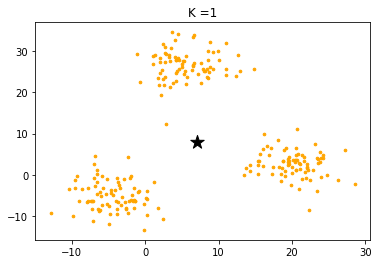

Sum of square distance for K= 2 is: 36670.588689374934


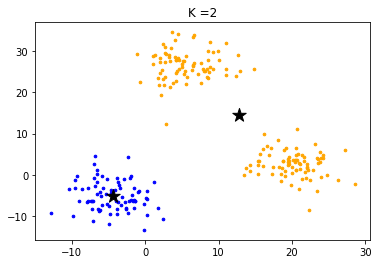

Sum of square distance for K= 3 is: 5144.917320751413


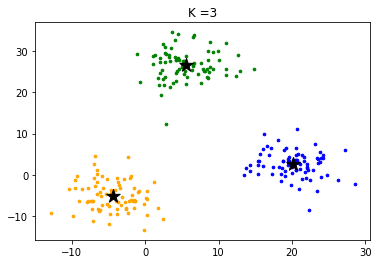

Sum of square distance for K= 4 is: 4546.681644671842


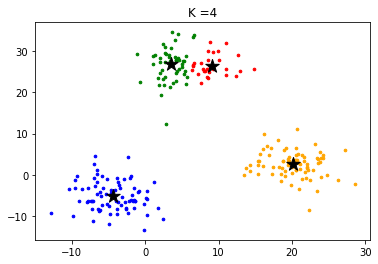

In [141]:
#  Write code here
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
colors=['orange', 'blue', 'green', 'red']
K_arr = [1,2,3,4]
ssdtotal = [0]*len(K_arr)
for i in range(len(K_arr)):
    #centroids = np.random.randn(K_arr[i],data.shape[1])*std + mean
    centroids = np.random.randn(K_arr[i],2) 
    for k in range(len(centroids)):
        centroids[k] = centroids[k]*std + mean
    dfcent = pd.DataFrame(centroids)
    centroids_new, data_class = kmeans(data,K_arr[i],dfcent)
    for j in range(len(data)):
        plt.scatter(data[0][j], data[1][j], s=7, color = colors[int(data_class[j])-1])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='black', s=200)
    plt.title('K =%d'%K_arr[i])
    ssd = ssd_calc(data, centroids_new)
    ssdtotal[i] = np.sum(ssd)
    print('Sum of square distance for K=',K_arr[i], 'is:', ssdtotal[i])
    plt.show()

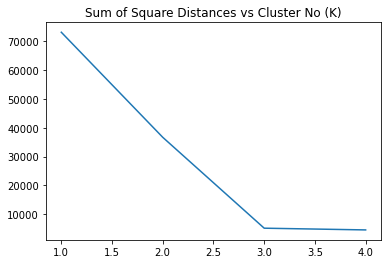

In [142]:
plt.plot(K_arr, ssdtotal)
plt.title('Sum of Square Distances vs Cluster No (K)')
plt.show()

**Observations:**

We can see that the sum of square distances (SSD) keep on decreasing as we increase the number of clusters. From the above graph, the elbow point, meaning the point after which there is not significant change in SSD values, is K=3. So, choosing K=3 will be the optimal choice. Often the clusters try to overfit after the elbow point, so K>3 won't necessarily be a good choice

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

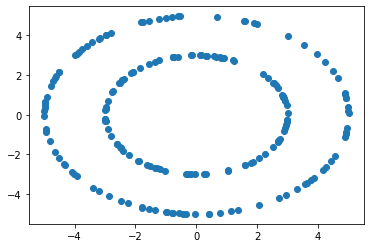

In [122]:
#  Write code here
df2 = pd.read_csv('kmc-data2.csv', header = None)
plt.scatter(df2[0], df2[1])

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

In [145]:
#  Write code here

kmeans = KMeans(n_clusters=2, random_state=0).fit(df2)
df2_class = kmeans.labels_
centroids = kmeans.cluster_centers_

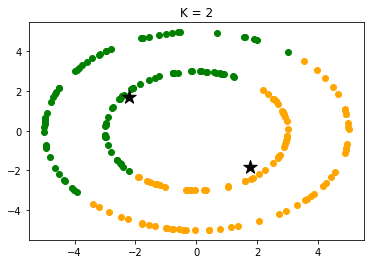

In [151]:
colors = ['orange', 'green']
for j in range(len(df2)):
    plt.scatter(df2[0][j], df2[1][j], color = colors[int(df2_class[j])])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='black', s=200)
plt.title('K = 2')
plt.show()

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

In [166]:
#  Write code here
centre = np.mean(df2, axis = 0)
data2 = np.zeros((len(df2), 2))
for i in range(len(df2)):
    for d in range(df2.shape[1]):
        data2[i][1] = data2[i][1] + (df2[d][i] - centre[d])**2
    data2[i][0] = i

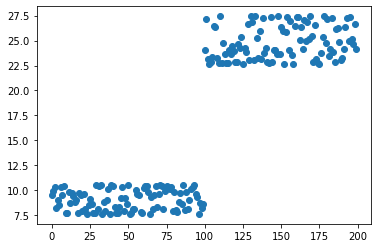

In [170]:
plt.scatter(data2[:,0], data2[:,1])

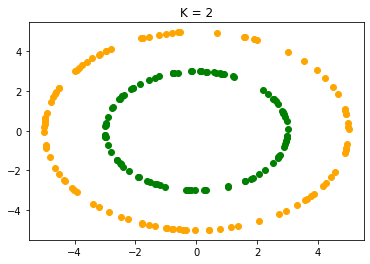

In [174]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(data2)
df2_class2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_
colors = ['orange', 'green']
for j in range(len(df2)):
    plt.scatter(df2[0][j], df2[1][j], color = colors[int(df2_class2[j])])
#plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='black', s=200)
plt.title('K = 2')
plt.show()

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [178]:
dfbank = pd.read_csv('data_banknote_authentication.csv', header = None)
y = dfbank[4]
x = dfbank
del x[4]

In [179]:
#  Write code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [184]:
k = len(y.unique())
kmeans = KMeans(n_clusters=k, random_state=0).fit(x_train)
y_pred = kmeans.predict(x_test)
accuracy_score(y_test, y_pred)

0.6218181818181818

## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

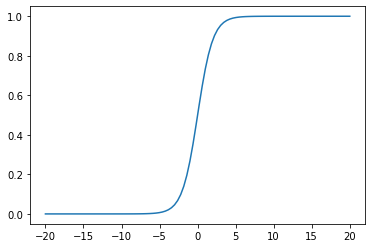

In [199]:
# Code here
x1 = np.linspace(-20,20,100)
y1 = 1/(1+np.exp(-x1))
plt.plot(x1,y1)

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

The sigmoid function is bound between the x_range that is given. **Range**: [0,1]

Near the negative extreme points of the range, the value remains very close to 0. As it comes near -5, the value slightly starts to deviate and suddenly goes under a steep (continuous) change in values from around -3 to 3. Now towards the positive values of x, the value tends to reach 1 and for extreme positive points, the value touches y=1



**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

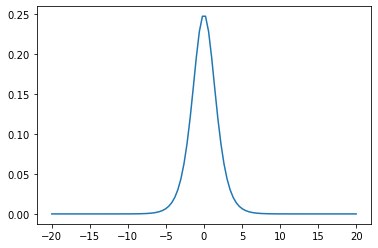

In [200]:
# Code here
x2 = np.linspace(-20,20,100)
y2 = np.exp(-x2)/((1+np.exp(-x2))**2)
plt.plot(x2,y2)

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [149]:
# Code here
x_log_input = pd.read_csv('X_logistic.txt', header = None)
x = [0]*len(x_log_input)
for i in range(len(x_log_input)):
    x[i] = [float(x) for x in x_log_input[0][i].split()] 
x_log = pd.DataFrame(x)

y_log = pd.read_csv('y_logistic.txt', header = None)

y_log = np.array(y_log)
x_log = np.array(x_log)

x1, x_test, y1, y_test = train_test_split(x_log, y_log, test_size=0.10, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.111, random_state = 42)

In [150]:
learning_rate = [0.001, 0.01, 0.1]
n_iter = [50, 100, 1000]
dim  = x_log.shape[1]
nos = len(x_train)

#Defining Cost
J = np.zeros(3*3*(dim + 1 + 1)).reshape(3,3, (dim + 1 + 1))

#Defining Validation Cost Matrix
validation_cost = np.zeros(3*3).reshape(3, 3)

#Defining a matrix to store training cost descent
training_cost_series = []

In [151]:
import random
def sigmoid(x):
    s = 1.0/(1.0 + np.exp(-1.0 * x))
    return s

In [152]:
def cost(y_train, model_train):
    #model_train = model_train.reshape(len(y_train),1)
    cost = -(1 / len(y_train)) * (np.dot(y_train, np.log(model_train)) + np.dot((np.ones(len(y_train))-y_train), (np.log(np.ones(len(y_train))-model_train))))
    return cost

a=0
for i in learning_rate:
    b=0
    for j in n_iter:
        cost_log = []
        for k in range(j):
            #Random weight initializtion
            beta = np.array(random.sample(range(-8, 8), 2)).reshape(2,1)
            bias = np.array(random.sample(range(-8, 8), 1)).reshape(1,1)
            lin_comb_train = np.dot(x_train, beta) + bias
            model_train = sigmoid(lin_comb_train)
            dbeta = (1/len(y_train)) * np.dot(x_train.T, (model_train - y_train))
            dbias = (1/len(y_train)) * np.sum(model_train - y_train)
            beta = beta - i * dbeta
            bias = bias - i * dbias
            cost_log.append(cost(y_train.T, model_train))  
        training_cost_series.append(cost_log)
        J[a][b][0] = cost_log[-1][-1]
        J[a][b][2:] = beta.T
        J[a][b][1] = bias 
        lin_comb_val = np.dot(x_val, beta) + (bias)
        model_val = sigmoid(lin_comb_val)
        validation_cost[a][b] = cost(y_val.T, model_val)
        b+=1
    a+=1

<ipython-input-152-09f47cafe2b0>:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / len(y_train)) * (np.dot(y_train, np.log(model_train)) + np.dot((np.ones(len(y_train))-y_train), (np.log(np.ones(len(y_train))-model_train))))


In [153]:
J

array([[[ 1.45740000e+03, -5.99950000e+00, -5.99700250e+00,
          2.00138375e+00],
        [ 6.82400019e+02,  6.00050000e+00, -1.99700250e+00,
         -3.99861625e+00],
        [ 1.41430000e+03,  2.00050000e+00, -2.99700250e+00,
         -6.99861625e+00]],

       [[ 2.35210000e+03, -2.99500000e+00, -6.97002500e+00,
         -4.98616250e+00],
        [ 8.14408139e+02,  5.00499898e+00, -6.97002993e+00,
          6.01383390e+00],
        [ 7.19200068e+02,  6.00499999e+00, -3.97002504e+00,
          1.38374734e-02]],

       [[ 1.07889636e+02, -2.04312659e+00,  4.78359130e+00,
         -6.14612222e+00],
        [ 7.68500007e+02, -8.04999998e+00,  1.74875009e+00,
          4.82837504e+00],
        [ 1.92572260e+02, -5.04941572e+00,  3.75160201e+00,
         -3.16960323e+00]]])

In [154]:
min_cost = np.amin(J[:,:,0])
result = np.where(J == min_cost)
learning_rate_index = int(result[0])
iteration_index = int(result[1])
min_cost

107.88963592132295

In [155]:
# Report accuracy
beta_final = J[learning_rate_index][iteration_index][2:]
bias_final = J[learning_rate_index][iteration_index][1]

lin_comb_test = np.dot(x_test, beta_final) + (bias_final)
model_test = sigmoid(lin_comb_test)

y_pred = [1 if i > 0.5 else 0 for i in model_test]        

test_cost = cost(y_test.T, model_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
beta_final = J[2][0][2:]
bias_final = J[2][0][1]

acc = (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[1][0] + cnf_matrix[0][1])

print('Accuracy is:', acc)
print('Weight and bias are:', beta_final, bias_final)

Accuracy is: 0.6
Weight and bias are: [ 4.7835913  -6.14612222] -2.0431265862797305


In [159]:
cnf_matrix

array([[2, 4],
       [0, 4]], dtype=int64)

**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

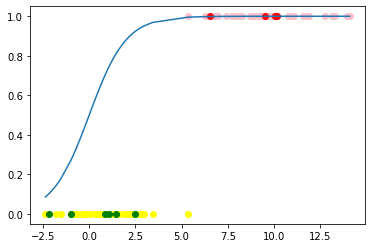

In [158]:
# Code here
x_terms_test = [0]*len(x_test)
for i in range(len(x_test)):
    x_terms_test[i] = bias_final + beta_final[0]*x_test[i][0] + beta_final[1]*x_test[i][1]

x_terms_train = [0]*len(x_train)
for i in range(len(x_train)):
    x_terms_train[i] = bias_final + beta_final[0]*x_train[i][0] + beta_final[1]*x_train[i][1]

x_terms = [0]*len(x_log)
for i in range(len(x_train)):
    x_terms[i] = bias_final + beta_final[0]*x_log[i][0] + beta_final[1]*x_log[i][1]
    
for i in range(len(x_terms_train)):    
    if y_train[i] == 0:
        plt.scatter(x_terms_train[i], y_train[i], color = 'yellow')
    if y_train[i] == 1:
        plt.scatter(x_terms_train[i], y_train[i], color = 'pink')

for i in range(len(x_terms_test)):    
    if y_test[i] == 0:
        plt.scatter(x_terms_test[i], y_test[i], color = 'green')
    if y_test[i] == 1:
        plt.scatter(x_terms_test[i], y_test[i], color = 'red')
    
x_terms.sort()
z = [0]*len(x_terms)
for i in range(len(x_terms)):
    z[i] = 1.0/(1.0 + np.exp(-1.0 * x_terms[i]))
plt.plot(x_terms, z)
plt.show()

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [224]:
# Code here
dfbank = pd.read_csv('data_banknote_authentication.csv', header = None)
y = dfbank[4]
x = dfbank
del x[4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [225]:
# Report accuracy here
accuracy_score(y_test, y_pred)

0.9890909090909091